### Image Classification using CNN

#### Importing Libraries

In [71]:
#import libraries

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models,datasets,Sequential
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

#### Load and Preprocess the data

In [57]:
# Load and preprocess the dataset

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#### Normalize the images

In [58]:
#normalizing the images to the range of 0  and 1

train_images = train_images/ 255
test_images = test_images / 255

#### One-hot Encoding on labels

In [59]:
# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [60]:
#class names of cifar10 dataset

class_names = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

#### Visualize the Images in 5x5 Grid

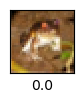

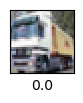

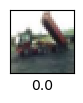

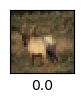

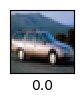

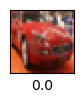

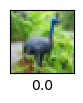

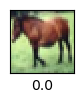

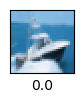

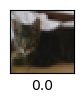

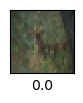

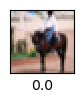

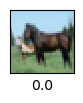

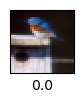

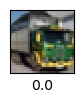

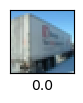

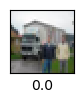

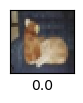

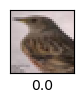

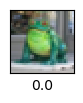

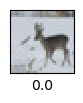

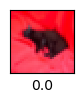

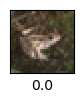

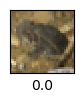

In [61]:
for i in range(24):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(train_labels[i][0])
    plt.show()
    

#### Build,Compile and Train the  CNN Model

In [62]:

# Define the CNN architecture
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create the model
input_shape = train_images.shape[1:]
num_classes = train_labels.shape[1]
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


C:\Users\aryan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.3072 - loss: 1.8648 - val_accuracy: 0.4950 - val_loss: 1.3835
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.5159 - loss: 1.3440 - val_accuracy: 0.5412 - val_loss: 1.2843
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.5763 - loss: 1.1954 - val_accuracy: 0.6016 - val_loss: 1.1263
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.6245 - loss: 1.0637 - val_accuracy: 0.6214 - val_loss: 1.1129
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.6514 - loss: 0.9884 - val_accuracy: 0.6578 - val_loss: 1.0058
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.6776 - loss: 0.9144 - val_accuracy: 0.6652 - val_loss: 0.9565
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.6964 - loss: 0.8619 - val_accuracy: 0.6822 - val_loss: 0.9099
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.7148 - loss: 0.8108 - 

#### Evaluation of Model

In [63]:
loss,accuracy = model.evaluate(test_images,test_labels)
print('The loss is:',loss)
print('The accuracy of model is:',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6999 - loss: 0.8708
The loss is: 0.8812059164047241
The accuracy of model is: 0.6930000185966492


In [64]:
# Predict probabilities for test images

predicted_probabilities = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [65]:
# Convert probabilities to class labels

predicted_labels = np.argmax(predicted_probabilities, axis=1)

In [66]:
# Convert one-hot encoded labels back to single integer labels

true_labels = np.argmax(test_labels, axis=1)

#### Evaluation Metrics

In [67]:
# Calculate precision, recall, and F1-score

precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.708530980982545
Recall: 0.693
F1-score: 0.6967447538661661


Text(0.5, 1.0, 'Confusion Matrix')

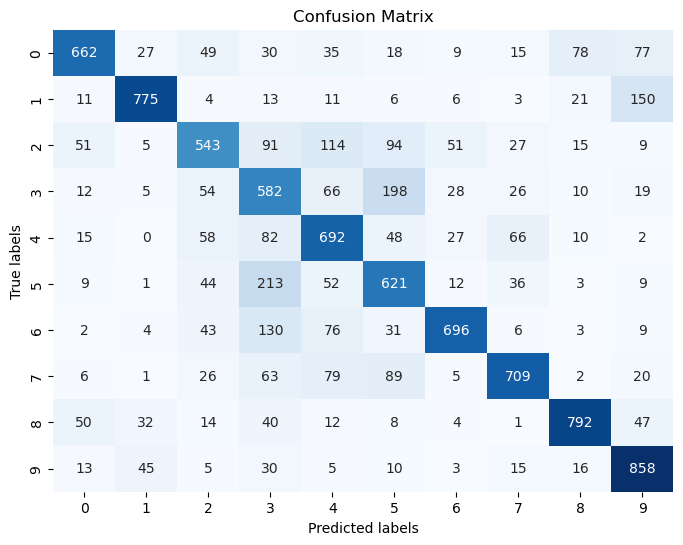

In [72]:
# Generate confusion matrix

cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

#### Save the Model

In [12]:
# Save the model with .keras extension
model.save('image_classifier.keras')


In [13]:
model = models.load_model('image_classifier.keras')

#### Model Summary

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

#### Input an Image

In [22]:
# Provide the full path to the image file

img_path = r'C:\Users\aryan\Cnn\bird.png'

# Attempt to load the image
img2 = cv.imread(img_path)

# Check if the image was successfully loaded
if img2 is None:
    print("Error: Image not loaded")
else:
    print("Image loaded successfully")


Image loaded successfully


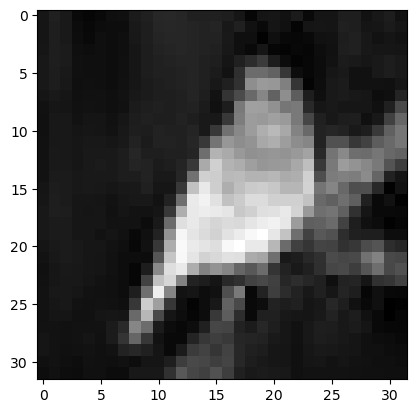

In [23]:
#Inputing Real time image

converted_img = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
plt.imshow(converted_img,cmap=plt.cm.binary)

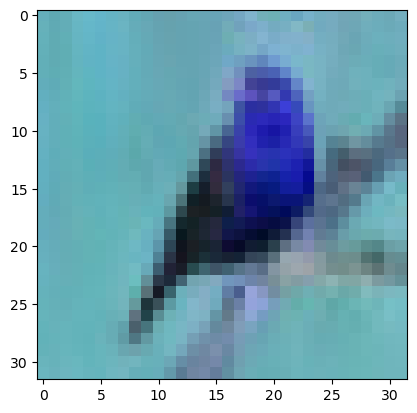

In [24]:
plt.imshow(img2,cmap=plt.cm.binary)

In [25]:
try:
    # Normalize the image data
    img2_normalized = np.array([img2]) / 255.0
    
    # Make predictions
    prediction = model.predict(img2_normalized)
    
    # Get the index of the highest probability
    index = np.argmax(prediction)
    
    print("Predicted class index:", index)
except Exception as e:
    print("Error occurred:", e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class index: 2


#### Predicted Class

In [49]:
print('The Prediction is:',class_names[index])

The Prediction is: Bird


#### Inputed a Real Time Image

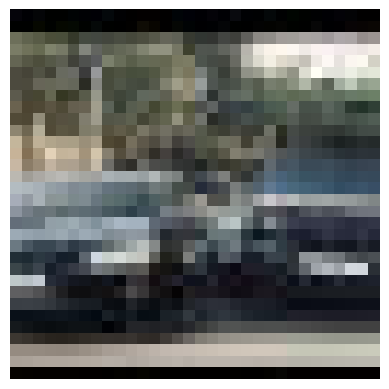

In [81]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Provide the full path to the image file
img_path = r'C:\Users\aryan\Cnn\real_car.jpg'

# Attempt to load the image
try:
    car_img = mpimg.imread(img_path)
    # Display the original image
    plt.imshow(car_img)
    plt.axis('off')  # Hide axis
    plt.show()
except FileNotFoundError:
    print("Error: Image not found")


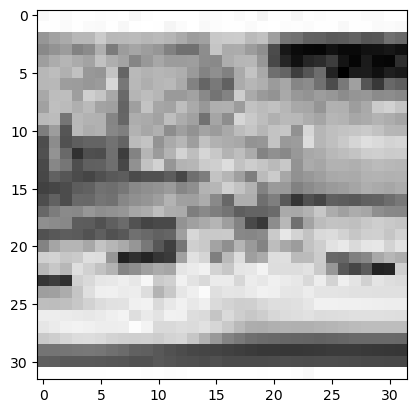

In [82]:
#Inputing Real time image

converted_img = cv.cvtColor(car_img, cv.COLOR_BGR2GRAY)
plt.imshow(converted_img,cmap=plt.cm.binary)

In [83]:
try:
    # Normalize the image data
    carimg_normalized = np.array([img]) / 255.0
    
    # Make predictions
    prediction = model.predict(carimg_normalized)
    
    # Get the index of the highest probability
    index = np.argmax(prediction)
    
    print("Predicted class index:", index)
except Exception as e:
    print("Error occurred:", e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted class index: 1


#### Predicted Class

In [84]:
print('The Prediction is:',class_names[index])

The Prediction is: Car
